<a href="https://colab.research.google.com/github/PsorTheDoctor/learning-from-videos/blob/master/demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q einops pybullet

In [ ]:
!git clone https://github.com/PsorTheDoctor/learning-from-videos.git
%cd learning-from-videos

Cloning into 'learning-from-videos'...
remote: Enumerating objects: 228, done.
remote: Counting objects: 100% (158/158), done.
remote: Compressing objects: 100% (102/102), done.
remote: Total 228 (delta 95), reused 98 (delta 52), pack-reused 70
Receiving objects: 100% (228/228), 244.93 KiB | 3.27 MiB/s, done.
Resolving deltas: 100% (113/113), done.
/content/learning-from-videos


In [ ]:
from google.colab import drive
drive.mount('/content/drive')  # force_remount=True)

Mounted at /content/drive


##Snake

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from models.vit import DeepViT

from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

"""
COLAB SESSION USUALLY CRASHES AFTER 2800 ITERATIONS !!
"""
epochs = 1000  # Approx. 20 mins
path = '../drive/MyDrive/learning-from-videos/data/snake/'
jointsPath = path + 'train/joints.npy'
imagesPath = path + 'train/images.npy'

print(np.load(imagesPath).shape)
print(np.load(jointsPath).shape)

vit = DeepViT(
  image_size = 224,
  patch_size = 32,
  num_classes = 2,
  dim = 1024,
  depth = 6,
  heads = 16,
  mlp_dim = 2048,
  dropout = 0.1,
  emb_dropout = 0.1
)
historySnake = vit.fit(epochs, jointsPath, imagesPath)

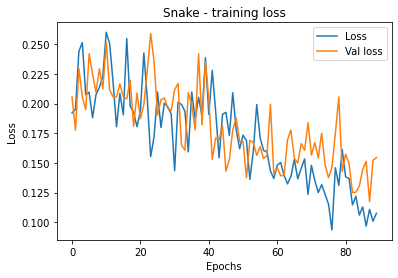

In [ ]:
np.save('history_snake.npy', historySnake)

def plotHistory(history, modelName):
  valStep = 10
  n = 10 
  epochs = range(n + 1, len(history['loss'] * valStep + 1)
  # Omitting first n epochs to clarify plot
  plt.plot(epochs, history['loss'][n:], label='Loss')
  plt.plot(epochs, history['val_loss'][n:], label='Val loss')
  plt.title(f'{modelName.capitalize()} - training loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

plot_history(historySnake, 'Snake')

In [ ]:
testImages = np.load(path + 'test/images.npy')
testJoints = np.load(path + 'test/joints.npy')
predJoints = vit(testImages)

pred = pd.concat([pd.DataFrame(np.squeeze(predJoints), columns=['pred_joint_1', 'pred_joint_2']),
                  pd.DataFrame(np.squeeze(testJoints), columns=['true_joint_1', 'true_joint_2']),
                  pd.DataFrame(np.squeeze(predJoints - testJoints), 
                               columns=['error_joint_1', 'error_joint_2'])], axis=1)
pred.head()

,pred_joint_1,pred_joint_2,true_joint_1,true_joint_2,error_joint_1,error_joint_2
0,-0.769078,-0.429118,-0.410268,-0.136914,-0.358810,-0.292204
1,0.161692,-0.518171,-0.259984,-0.577953,0.421676,0.059782
2,0.148708,-0.128909,-0.903939,-0.463761,1.052648,0.334853
3,-0.195921,-0.098380,0.352720,0.659732,-0.548641,-0.758113
4,-0.188339,0.479722,0.758945,0.801495,-0.947284,-0.321774


#Turtle

In [ ]:
path = '../drive/MyDrive/data/turtle/'
jointsPath = path + 'train/joints.npy'
imagesPath = path + 'train/images.npy'

vit = DeepViT(
  image_size = 256,
  patch_size = 32,
  num_classes = 4,
  dim = 1024,
  depth = 6,
  heads = 16,
  mlp_dim = 2048,
  dropout = 0.1,
  emb_dropout = 0.1
)
historyTurtle = vit.fit(epochs, jointsPath, imagesPath)

In [ ]:
plt.plot(historyTurtle)
plt.title('Turtle - training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [ ]:
testImages = np.load(path + 'test/images.npy')
testJoints = np.load(path + 'test/joints.npy')
predJoints = vit(testImages)

pred = pd.concat([pd.DataFrame(np.squeeze(predJoints), 
                               columns=['pred_joint_1', 'pred_joint_2', 'pred_joint_3', 'pred_joint_4']),
                  pd.DataFrame(np.squeeze(testJoints), 
                               columns=['true_joint_1', 'true_joint_2', 'true_joint_3', 'true_joint_4']),
                  pd.DataFrame(np.squeeze(predJoints - testJoints), 
                               columns=['error_joint_1', 'error_joint_2'])], axis=1)
pred.head()